In [1]:
%matplotlib notebook
import sys as sys
sys.path.append('scripts27/')
sys.path.append('scripts27/gauss_mix')

import pyglet as pgl
import numpy as np

from main import Main
import gmix_model as gmix
import gmix_sample_mixture as smpl
import graph_NPZ as graph_highD

Loading chipmunk for Darwin (64bit) [/Users/azane/GitRepo/spider/venv/lib/python2.7/site-packages/pymunk/libchipmunk.dylib]


In [2]:
main = Main()
pgl.app.run()

In [3]:
s_x, s_t = gmix.get_xt_from_npz('data/spi_gmix_train.npz', True)
xDims = np.array([0,1,2,-1]) #muscle, muscle, balance, time
s_x = s_x[:,xDims]

_, v, c, t, s = main.space.expHQ.graph_space(s_x)

main.space.expModel.build_graph()
m, v, u = main.space.expModel.get_xmvu()

#x, y = smpl.sample_expectation(t_x, m, v, u) #set to gmm sample
x, y = smpl.mixture_expectation(s_x, m, v, u) #set to gmm expectation

<IPython.core.display.Javascript object>


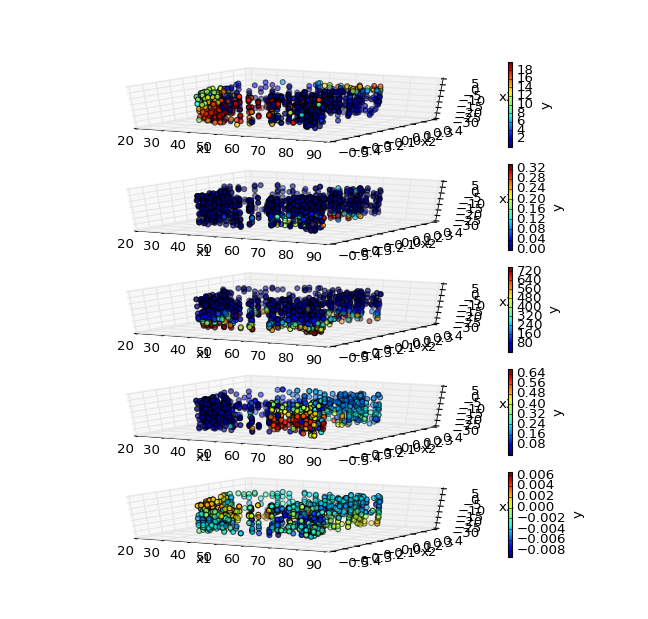

(<matplotlib.figure.Figure at 0x11791a110>,
 <mpl_toolkits.mplot3d.art3d.Path3DCollection at 0x117171a90>)

In [7]:
xCols = [1,2,-1]
yLow = -0.03
yHigh = 0.03

#point value
fig, _ = graph_highD.graph3x1y(s_x, v, xCols=xCols,
                      sbpltLoc=511, numPoints=1000)
graph_highD.graph3x1y(s_x, c, xCols=xCols, fig=fig,
                      sbpltLoc=512, numPoints=1000)
graph_highD.graph3x1y(s_x, t, xCols=xCols, fig=fig,
                      sbpltLoc=513, numPoints=1000)
graph_highD.graph3x1y(s_x, s, xCols=xCols, fig=fig,
                      sbpltLoc=514, numPoints=1000)
#sensor expecation
graph_highD.graph3x1y(s_x, y, xCols=xCols,
                      yLow=yLow, yHigh=yHigh, fig=fig,
                      sbpltLoc=515, numPoints=1000)